# Bracketing

This is a technique to determine the local minimum within an interval. In the event a derivative does not exist, this type of technique works.

## Utility Functions

Below will setup a viewable plotting function.

In [25]:
using Plots 

function plot_f(f, x, int_x, int_y)
    y = f.(x)
    plot(x, y)
    
    n_pts = length(int_x)
    c = distinguishable_colors(n_pts)
    scatter!(int_x, int_y, c=c)
    
    for i in 1:n_pts
        val = string(i + parse(Int, 'a'))
        annotate!(int_x, int_y + 0.1, val, c=c[i])
    end
end

plot_f (generic function with 1 method)

## Types of Bracketing

Let's start with a simple univariate bracketing method to find the local minimum. The univarite function must be convex, if it is not this method will not work (i.e., $e^x$ will fail).

1. **bracket_univariate_minimum**
    1. Inputs: a function, starting x position 0, s step size, and k expansion factor. 
    1. Outputs: a bracket interval [a,c]

In [26]:
function bracket_univariate_minimum(f, x=0., s=1e-2, k=2.0)
    # bracket upate
    bracket_update(a, s) = [a + s, f(a + s)]
    
    # setup initial interval
    a, ya = bracket_update(x, 0)
    b, yb = bracket_update(a, s)
    
    # if b is greater than a, swap variables, and change sign of step size
    if yb > ya
        a, b = b, a
        ya, yb = yb, ya
        s *= -1
    end
    
    c, yc = 0, 0
    anim = @animate for i in 1:100
        c, yc = bracket_update(b, s)
        rng = range(-5, 5, 100)
        plot_f(f, rng, [a, b, c], [ya, yb, yc])
    
        if yc > yb
            break
        end
        a, ya, b, yb = b, yb, c, yc
        s *= k
    end
    return a > c ? (c, a) : (a, c), anim
end

bracket_univariate_minimum (generic function with 4 methods)

In [27]:
f(x) = sin(x)

f (generic function with 1 method)

In [28]:
interval, anim = bracket_univariate_minimum(f)

LoadError: ArgumentError: invalid base 10 digit 'a'

[ Info: Saved animation to /Users/dakre/work/JuliaOptiMize/tmp.gif


Plots.AnimatedGif("/Users/dakre/work/JuliaOptiMize/tmp.gif")
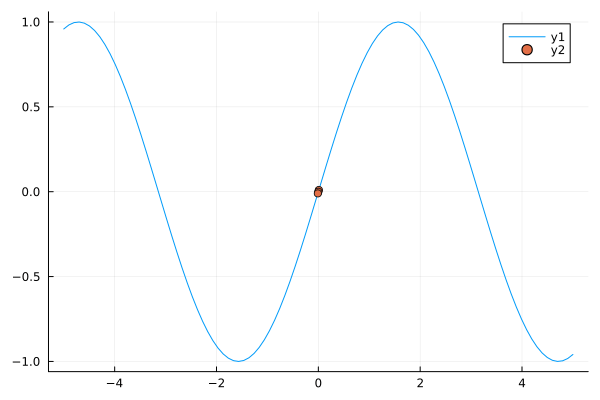

In [20]:
gif(anim, fps = 5)